In [1]:
import pandas as pd

data = pd.read_csv('train.csv')
data.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [2]:
data = data.drop(['store', 'item'], axis=1)

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data['date'] = data['date'].dt.to_period("M")
monthly_sales = data.groupby('date').sum().reset_index()

In [6]:
monthly_sales.head(10)

,date,sales
0,2013-01,454904
1,2013-02,459417
2,2013-03,617382
3,2013-04,682274
4,2013-05,763242
5,2013-06,795597
6,2013-07,855922
7,2013-08,766761
8,2013-09,689907
9,2013-10,656587


In [8]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [9]:
monthly_sales = monthly_sales.rename(columns={'date': 'ds', 'sales':'y'})

In [11]:
monthly_sales.head(10)

,ds,y
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


In [12]:
from prophet import Prophet

In [13]:
model = Prophet()
model.fit(monthly_sales)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjhg7za5i/81igt118.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjhg7za5i/tq2p2gg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63435', 'data', 'file=/tmp/tmpjhg7za5i/81igt118.json', 'init=/tmp/tmpjhg7za5i/tq2p2gg9.json', 'output', 'file=/tmp/tmpjhg7za5i/prophet_modelbw4c49oe/prophet_model-20231109180847.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:08:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future_dates = model.make_future_dataframe(periods=365, freq='D')

In [15]:
forecast = model.predict(future_dates)

In [16]:
print(forecast)

            ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2013-01-01  633270.283909  396850.468407  447691.506267  633270.283909   
1   2013-02-01  639941.005511  402391.556138  449945.435966  639941.005511   
2   2013-03-01  645966.173410  578065.600425  625355.531609  645966.173410   
3   2013-04-01  652636.895017  675562.112484  724014.751445  652636.895017   
4   2013-05-01  659092.432056  761319.792270  810436.485293  659092.432056   
..         ...            ...            ...            ...            ...   
420 2018-11-27  968636.603040  743701.915205  793082.892001  965760.980013   
421 2018-11-28  968766.186259  741414.442654  792780.339921  965877.025414   
422 2018-11-29  968895.769478  739606.864455  790268.912849  965994.303720   
423 2018-11-30  969025.352697  735608.700709  787237.791806  966116.113374   
424 2018-12-01  969154.935916  736031.985259  783349.047113  966237.923028   

       trend_upper  additive_terms  additive_terms_lower  \
0  

In [17]:
forecast.to_csv('output_result2.csv', index=False)

In [18]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

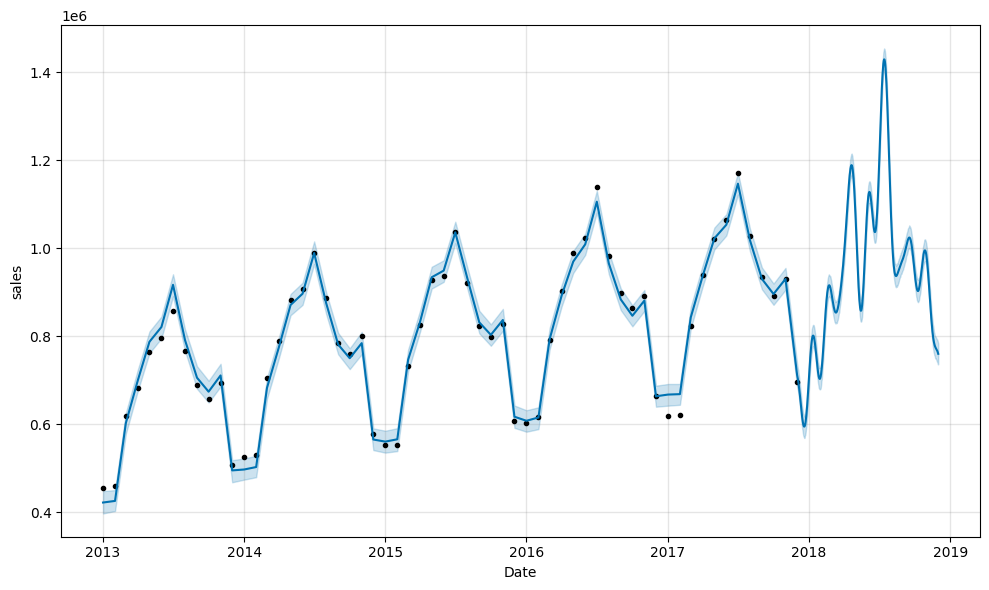

In [19]:
plt.figure()
model.plot(forecast, xlabel='Date', ylabel='sales')
plt.show()